In [ ]:
!pip install plotly

# **Linear Regression:**

##### In machine learning, linear regression is a supervised learning algorithm used for predicting continuous numeric values based on one or more input features (independent variables). It aims to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.There are 3 types of linear regression


1.   Simple Linear Regression(1 input feature in dataset)
2.   Multiple Linear Regression(more than 1 input feature in dataset)
3.   Polynomial Regression



### **Simple Linear Regression:**

<img src='https://d2jdgazzki9vjm.cloudfront.net/tutorial/machine-learning/images/linear-regression-in-machine-learning.png'>

#### simple linear regression is a type of supervised learning algorithm used to predict a continuous target variable based on a single independent feature (input variable). It assumes a linear relationship between the input and the output, where the target is modeled as a straight line of the form:

$$ y=\beta0+\beta1x$$
Where:
*  y is the dependent variable (the predicted value or target).
*  x is the independent variable (the input feature).
*  $\beta0$ is the intercept (the value of y when x=0)
*  $\beta1$ is the slope(how much y changes with unit change in x or weight of the input feature x)




**Example:**
##### If you're predicting a person’s weight (y) based on their height .(𝑥)
the simple linear regression model might look like:
  Weight=$\beta0$+$\beta1$x(Height)

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/375512-1.webp'/>

**Cost Function (Mean Squared Error):** The cost function used to evaluate the error is the mean squared error (MSE), which measures the average squared difference between the actual and predicted values:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
Where:
*   $y_i$ is the actual value of the data point i
*   $\hat{y_i}$ is the predicted value of the data point i
*   n is the total number of data points.
We need to minimize this error function to get the optimized m and b values to predicted the future data.

There ar 2 ways to find the values of **m and b** They are:


1.   Ordinary Least Squares Method
2.   Gradient Descent


#### **Ordinary Least Square Method For the Simple Linear Regression:**

The Ordinary Least Squares (OLS) method is a statistical technique used to estimate the parameters (coefficients) of a linear regression model. It aims to minimize the sum of the squared differences between the observed values (actual values) and the predicted values from the regression line. In other words, OLS finds the best-fitting line by minimizing the total squared error.

**Objective of OLS:**
##### The goal is to minimize the **Sum of Squared Errors (SSE)**, also called the **Residual Sum of Squares (RSS)**:
$$\text{SSE}=\sum_{i=1}^n(y_i-\hat{y_i})^2$$
This can be written as a function of both m and b:
  $$\text{SSE(m,b)}=\sum_{i=1}^n(y_i-mx_i-b)^2$$
because $$\hat{y_i}=mx_i+b$$
To minimize this Loss function we need to differentiate the above equation with m and b


*   Differentiate the above equation w.r.t **b** and set it to 0
    $$\text{SSE} = \sum_{i=1}^{n} (y_i - (mx_i + b))^2$$

    $$\frac{\partial \text{SSE}}{\partial b} = \frac{\partial}{\partial b} \left( \sum_{i=1}^{n} (y_i - (mx_i + b))^2 \right)$$

    $$\frac{\partial}{\partial b} (y_i - (mx_i + b))^2 = 2(y_i - (mx_i + b)) \cdot (-1)$$

    $$\frac{\partial \text{SSE}}{\partial b} = \sum_{i=1}^{n} -2 (y_i - (mx_i + b))$$

    $$\sum_{i=1}^{n} -2 (y_i - (mx_i + b)) = 0$$

    $$\sum_{i=1}^{n} (y_i - (mx_i + b)) = 0$$

    $$\sum_{i=1}^{n} y_i = m \sum_{i=1}^{n} x_i + b \cdot n$$
    Now devide each term by n
    $$\frac{\sum_{i=1}^{n} y_i}{n} = \frac{m \sum_{i=1}^{n} x_i}{n}+ \frac{b \cdot n}{n}$$
    $$\bar{y}=m\bar{x}+b$$
    so $$b=\bar{y}-m\bar{x}$$

*   Differentiate the above equation w.r.t **m** and set it to 0
    $$\text{SSE} = \sum_{i=1}^{n} (y_i - (mx_i + b))^2$$

    $$b = \bar{y} - m \bar{x}$$

  $$\text{SSE} = \sum_{i=1}^{n} \left( y_i - \left( mx_i + (\bar{y} - m \bar{x}) \right) \right)^2$$

  $$\text{SSE} = \sum_{i=1}^{n} \left( y_i - (mx_i + \bar{y} - m \bar{x}) \right)^2$$

  $$\frac{\partial \text{(SSE)}}{\partial m} = \frac{\partial}{\partial m} \left( \sum_{i=1}^{n} \left( y_i - (mx_i + \bar{y} - m \bar{x}) \right)^2 \right)$$

  $$\frac{\partial}{\partial m} (y_i - (mx_i + \bar{y} - m \bar{x}))^2 = 2\left(y_i - (mx_i + \bar{y} - m \bar{x})\right) \cdot \left(-x_i + \bar{x}\right)$$

 $$\frac{\partial \text{(SSE)}}{\partial m} = \sum_{i=1}^{n} -2\left(y_i - (mx_i + \bar{y} - m \bar{x})\right) \left(x_i - \bar{x}\right)$$

 $$\sum_{i=1}^{n} -2\left(y_i - (mx_i + \bar{y} - m \bar{x})\right) \left(x_i - \bar{x}\right) = 0$$
 $$\sum_{i=1}^{n} \left((y_i - \bar{y}) - m(x_i - \bar{x})\right)(x_i - \bar{x}) = 0$$

$$m = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$


#### **Implementation:**

In [ ]:
#define a class and implementing the above method
class SimpleLinearRegression:
  def __init__(self):
    self.m=None
    self.b=None
  def fit(self,x_train,y_train):
    x_train=x_train.values
    y_train=y_train.values
    x_mean=np.mean(x_train)
    y_mean=np.mean(y_train)
    num=0
    den=0
    for i in range(len(x_train)):
      num+=(x_train[i]-x_mean)*(y_train[i]-y_mean)
      den+=(x_train[i]-x_mean)**2
    self.m=num/den
    self.b=y_mean-((self.m)*x_mean)
  def predict(self,x_test):
    return self.m*x_test+self.b

In [ ]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#loading the dataset
salary_data=pd.read_csv("Salary_dataset.csv")
salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


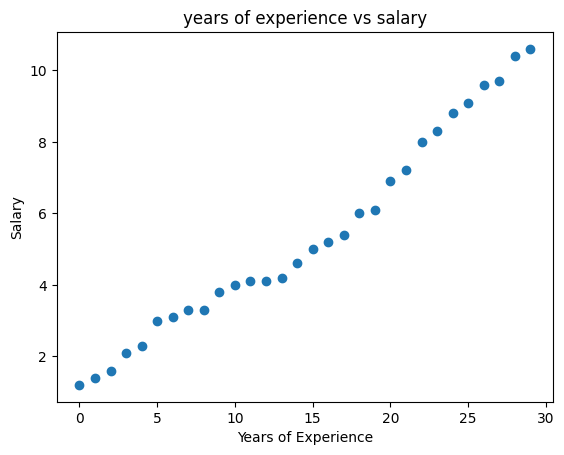

In [ ]:
#plotting the data in 2d
plt.scatter(salary_data.iloc[:,0],salary_data.iloc[:,1])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("years of experience vs salary")
plt.show()

In [ ]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(salary_data.iloc[:,0],salary_data.iloc[:,1],test_size=0.2,random_state=2)

In [ ]:
#creating object for the simple linear regression class
slr=SimpleLinearRegression()
slr.fit(x_train,y_train)
predicted_values=slr.predict(x_test)
#calculating the r2 score of the model
print(r2_score(y_test,predicted_values))

0.9446611415086158


[]

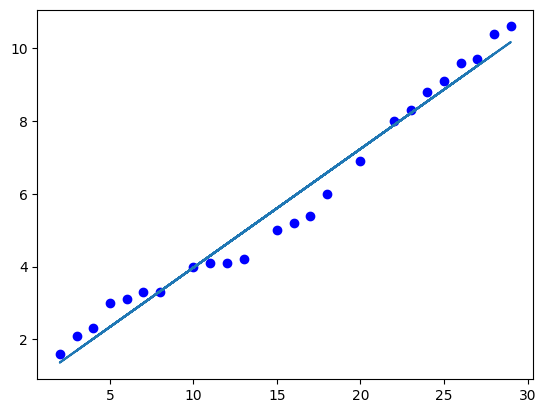

In [ ]:
#regression line for the data
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,slr.predict(x_train))
plt.plot()

In [ ]:
#finding the coefficients and intercept
print("coefficient of the feature is: ",slr.m)
print("intercept of the feature is: ",slr.b)

coefficient of the feature is:  0.3262171028999736
intercept of the feature is:  0.7113939510045748


In [ ]:
#predicting using the sklear.linear_model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))
print("coefficient of the feature is: ",lr.coef_)
print("intercept of the feature is: ",lr.intercept_)
print("r2 score of the model is: ",r2_score(y_test,lr.predict(pd.DataFrame(x_test))))

coefficient of the feature is:  [[0.3262171]]
intercept of the feature is:  [0.71139395]
r2 score of the model is:  0.9446611415086158


### **Multiple Linear Regression**

##### Multiple Linear Regression is a supervised learning algorithm used in machine learning to model the relationship between a dependent variable and two or more independent variables. It extends simple linear regression by allowing multiple predictors instead of just one. Here's how it works:
<img src='https://i.sstatic.net/XvNJK.png'/>

**Key Concepts:**
1.   **Dependent Variable (Target):**The variable you're trying to predict(denoted as $y$)
2.   **Independent Variables (Features):**The variables that you use to predict the dependent variable (denoted as $x_1,x_2,x_3..,x_n$)
3.   **Regression Coefficients:**These are the weights($\beta_1,\beta_2,...,\beta_n$)that the model learns for each independent variable, indicating the strength and direction of the relationship between each feature and the target.

**Mathematical Representation:**
The equation for multiple linear regression can be expressed as:
 $$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+....+\beta_nx_n$$


*   y:Dependent variable(target variable)
*   $x_1,x_2,x_3,...,x_n$:independent variables(features)
*   $\beta_0$:Intercept(bias term)
*   $\beta_0,\beta_1,\beta_2,..,\beta_n$:Coefficients(weights)

**Example:**
Suppose you want to predict the price of a house based on its size (in square feet), the number of bedrooms, and the age of the house. This would be a multiple linear regression problem where the house price is the dependent variable, and the size, number of bedrooms, and age are the independent variables.

The model equation might look like this:
  $$\text{Price}=\beta_0+\beta_1.size+\beta_2.Bedrooms+\beta_3.Age$$



**Mathematical Formulation:**
Let's consider our dataset contains m columns(features) and n tuples(rows) then
$$\hat{y_1}=\beta_0+\beta_1.x_{11}+\beta_2.x_{12}+....+\beta_n.x_{1m}$$
$$\hat{y_2}=\beta_0+\beta_1.x_{21}+\beta_2.x_{22}+....+\beta_n.x_{2m}$$
$$  ..........................................$$
$$  .........................................$$$$  ...........................................$$$$  ...........................................$$
$$\hat{y_n}=\beta_0+\beta_1.x_{n1}+\beta_2.x_{n2}+....+\beta_n.x_{nm}$$
The matrix form of the multiple linear regression model is:
$$\hat{y} =
    \begin{bmatrix}
    \hat{y_1} \\
    \hat{y_2} \\
    \hat{y_3} \\
    \vdots \\
    \hat{y_n}
    \end{bmatrix}=
\begin{bmatrix}
\beta_0 +\beta_1.x_{11} + \beta_2.x_{12} + \dots +\beta_m.x_{1m} \\
\beta_0 + \beta_1.x_{21} + \beta_2.x_{22} + \dots + \beta_m.x_{2m} \\
    \vdots\\
\beta_0 + \beta_1.x_{n1} + \beta_2.x_{n2} + \dots + \beta_n.x_{nm}
\end{bmatrix}$$

$$\hat{y} =
    \begin{bmatrix}
    \hat{y_1} \\
    \hat{y_2} \\
    \hat{y_3} \\
    \vdots \\
    \hat{y_n}
    \end{bmatrix}=
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1m} \\
1 & x_{21} & x_{22} & \dots & x_{2m} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{nm}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{bmatrix}
$$
Therefore $\hat{y}$  can be represented as: $\hat{y}=X*\boldsymbol{\beta}$  Where
$ \text{X}= \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1m} \\
1 & x_{21} & x_{22} & \dots & x_{2m} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{nm}
\end{bmatrix}
$ and
$\beta=\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{bmatrix}$

After solving this equations we get $\boldsymbol{\beta}=((X^TX)^{-1})^TX^TY$

In [ ]:
#code implementation with visualization in 3d
data=pd.read_csv("income.csv")
x,y=data.iloc[:,0:2],data.iloc[:,2]
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
# Add scatter points
fig.add_trace(go.Scatter3d(x=x.iloc[:,0], y=x.iloc[:,1], z=y, mode='markers', marker=dict(size=5, color='blue', opacity=0.6), name='Data Points'))
fig.update_layout(
    scene=dict(
        xaxis_title='Feature1',
        yaxis_title='Feature2',
        zaxis_title='Output'
    ),
    title='Interactive 3D Plot with Data Points'
)
fig.show()

In [ ]:
#coding implementation of multiple linear regression using the ordinary least square method
class MultipleLinearRegression:
  def __init__(self):
    self.coefficients=None
    self.coef=None
    self.intercept=None
  def fit(self,x_train,y_train):
    x_train=x_train.values
    y_train=y_train.values
    x_train=np.hstack((np.ones((x_train.shape[0],1)),x_train))
    x_train_transpose=x_train.T
    inverse_matirix=np.linalg.inv(np.dot(x_train_transpose,x_train))
    self.coefficients=np.dot(np.dot(inverse_matirix,x_train.T),y_train)
    self.coef=self.coefficients[1:]
    self.intercept=self.coefficients[0]
  def predict(self,x_test):
    x_test=x_test.values
    x_test=np.hstack((np.ones((x_test.shape[0],1)),x_test))
    return np.dot(x_test,self.coefficients)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(x),pd.DataFrame(y),test_size=0.2,random_state=2)
mlr=MultipleLinearRegression()
mlr.fit(x_train,y_train)
predicted_values=mlr.predict(x_test)
print("r2 score of the model is: ",r2_score(y_test,predicted_values))

r2 score of the model is:  0.9579002513351086


In [ ]:
# Create the meshgrid for plotting the regression plane
X1, X2 = np.meshgrid(
    np.linspace(x.values[:,0].min(), x.values[:,0].max(), 50),
    np.linspace(x.values[:,1].min(), x.values[:,1].max(), 50)
)
# Calculate the corresponding Z values for the regression plane
Z = mlr.intercept+ mlr.coef[0] * X1 + mlr.coef[1] * X2
# Plotting the scatter points and regression plane using Plotly
fig = go.Figure()
# Surface plot for the regression plane
fig.add_trace(go.Surface(z=Z, x=X1, y=X2, colorscale='Viridis', opacity=0.7, name='Regression Plane'))

# Scatter plot for actual test data points with corrected opacity
fig.add_trace(go.Scatter3d(x=x.values[:,0], y=x.values[:,1], z=y.values.flatten(),
                           mode='markers', marker=dict(size=7, color='red', opacity=1.0), name='Data Points'))
# Update layout for better visualization
fig.update_layout(
    scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    scene=dict(
        xaxis_title='Feature1',
        yaxis_title='Feature2',
        zaxis_title='Output'
    ),
    title='Interactive 3D Plot with Data Points and Regression Plane'
)

# Show the plot
fig.show()


In [ ]:
#importing the dataframe
student_data=pd.read_csv("/content/Student_Performance.csv")
student_data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
#shape of the dataframe
print("shape of the data: ",student_data.shape)
#describe statistical measures of the data
student_data.describe()

shape of the data:  (10000, 6)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(student_data.iloc[0:,0:5].select_dtypes("int"),student_data.iloc[0:,5:],random_state=42,test_size=0.2)
mlr=MultipleLinearRegression()
mlr.fit(x_train,y_train)
predicted_values=mlr.predict(x_test)
print("r2 score of the model is: ",r2_score(y_test,predicted_values))

r2 score of the model is:  0.9887144552384186


In [ ]:
#implementing using sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.predict(x_test))

[[55.00786377]
 [22.31444624]
 [47.59404705]
 ...
 [16.48182916]
 [63.64243731]
 [46.23799491]]


##**Gradient Descent:**
Gradient Descent is an iterative optimization algorithm used to minimize a function, typically a cost function. In machine learning, it's widely used for finding the optimal parameters (e.g., weights in linear regression) by minimizing the error between predicted and actual values.

The core idea of Gradient Descent is to:


1. **Initialize Parameters:** Start with random values for the model's parameters (e.g., the coefficients in linear regression).  
2.  **Calculate the Gradient:**Compute the gradient (partial derivatives) of the cost function with respect to the parameters. This shows the direction of the steepest increase in the cost function.
3.  **Update Parameters:**Move the parameters in the opposite direction of the gradient by a small step (determined by a learning rate).
4.  **Repeat:**Continue this process until the cost function converges (reaches a minimum value).

In linear regression, the cost function is typically the Mean Squared Error (MSE), and Gradient Descent minimizes this error to find the best-fitting plane.

**Why Use Gradient Descent Over the Least Squares Method for Multiple Linear Regression?**


1.   **Computational Efficiency with Large Datasets:**Least Squares requires calculating the inverse of the matrix $X^TX$,where X is the matrix of input features.This operation has a time complexity of O($n^3$) where n is the number of features.
2.   **Flexibility with Different Cost Functions:**Least Squares is limited to only cost function associated with the regression problem.but Gradient descent can minimize any type of the Cost Function



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
class GDRegressor:
    def __init__(self, learning_rate=0.00001, epochs=3000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 0.001
        self.b = 0.001
    def fit(self, x_train, y_train):
        x_train = x_train.values.ravel()
        y_train = y_train.values.ravel()
        n = len(x_train)
        for i in range(self.epochs):
            # Calculate predictions
            y_pred = self.m * x_train + self.b
            # Calculate gradients
            gradient_b = (-2/n) * np.sum(y_train - y_pred)  # Gradient w.r.t. intercept b
            gradient_m = (-2/n) * np.sum((y_train - y_pred) * x_train)  # Gradient w.r.t. slope m
            # Update parameters
            self.b -= self.learning_rate * gradient_b  # Update intercept b
            self.m -= self.learning_rate * gradient_m  # Update slope m
    def predict(self, x_test):
        return self.m * x_test + self.b
# Loading the dataset
data = pd.read_csv("Salary_dataset.csv")
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0], data.iloc[:, 1], test_size=0.2, random_state=2)
# Using custom GDRegressor without scaling the data
gd = GDRegressor(learning_rate=0.001, epochs=4000)  # Adjusted parameters for raw data
gd.fit(pd.DataFrame(x_train), y_train)
# Predictions
y_pred = gd.predict(x_test)
#fitting linear regression model
lr=LinearRegression()
lr.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))
print("Linear Regression results:")
print("Intercept value: ", lr.intercept_)
print("Slope value: ", lr.coef_)
# Output final slope and intercept
print("Custom Gradient Descent Regressor results without scaling:")
print("Intercept value: ", gd.b)
print("Slope value: ", gd.m)
print("r2 score using sklearn linear regression",r2_score(y_test,lr.predict(pd.DataFrame(x_test))))
print("r2 score using custom gradient regressor",r2_score(y_test,y_pred))

Linear Regression results:
Intercept value:  [0.71139395]
Slope value:  [[0.3262171]]
Custom Gradient Descent Regressor results without scaling:
Intercept value:  0.6033714225136522
Slope value:  0.3315824885890158
r2 score using sklearn linear regression 0.9446611415086158
r2 score using custom gradient regressor 0.9387900258529881


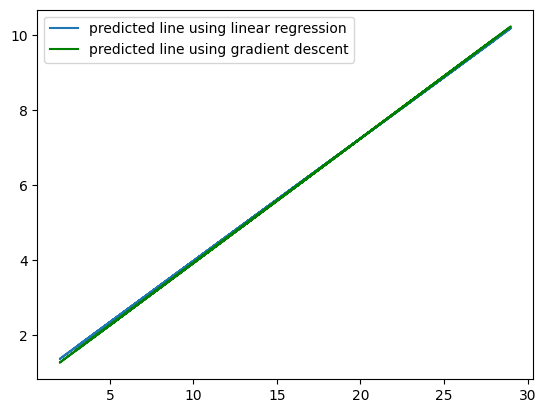

In [ ]:
plt.plot(x_train,lr.predict(pd.DataFrame(x_train)))
plt.plot(x_train,gd.predict(x_train),color='green')
plt.legend(["predicted line using linear regression","predicted line using gradient descent"])
plt.show()

In [ ]:
#coding the gradient descent for multiple fetures
class BGDRegressor:
    def __init__(self, learning_rate=0.001, epochs=500):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = None
        self.intercept = None
    def fit(self, x_train, y_train):
        x_train = x_train.values
        y_train = y_train.values
        n_samples, n_features = x_train.shape
        # Initialize coefficients and intercept
        self.intercept = 0
        self.coefficients = np.zeros(n_features)  # Start with zeros instead of ones
        # Gradient Descent Loop
        for i in range(self.epochs):
            y_pred = np.dot(x_train, self.coefficients) + self.intercept  # Predicted values
            # Calculate gradients
            derivative_intercept = (-2 / n_samples) * np.sum(y_train-y_pred)
            derivative_coefficients = (-2 / n_samples) * np.dot(x_train.T, y_train-y_pred)
            # Update intercept and coefficients
            self.intercept -= self.learning_rate * derivative_intercept
            self.coefficients -= self.learning_rate * derivative_coefficients
    def predict(self, x_test):
        x_test = x_test.values
        return np.dot(x_test, self.coefficients) + self.intercept
#loading the dataset
data=pd.read_csv("/content/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#splitting the data into test data and train data
x_train,x_test,y_train,y_test=train_test_split(data.iloc[0:,0:len(data.columns)-1],data.iloc[:,-1])
gd=BGDRegressor(learning_rate=0.0001,epochs=100)#put epochs to 3,90,000 to get the appoximated intercepts and coefficients
gd.fit(x_train.drop(data.columns[2],axis=1),y_train)
print("r2 score=",r2_score(y_test,gd.predict(x_test.drop(data.columns[2],axis=1))))

r2 score= 0.824377929296994


In [ ]:
import numpy as np
import pandas as pd
class SGDRegressor:
    def __init__(self, learning_rate=0.0001, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = None
        self.intercept = None
    def fit(self, x_train, y_train):
        x_train = x_train.values
        y_train = y_train.values
        n_samples, n_features = x_train.shape
        # Initialize coefficients and intercept
        self.intercept = 0
        self.coefficients = np.zeros(n_features)  # Start with zeros instead of ones
        # Gradient Descent Loop
        for i in range(self.epochs):
            for j in range(n_samples):
                random_index = np.random.randint(0, n_samples)  # Pick a random sample index
                y_pred = np.dot(x_train[random_index], self.coefficients) + self.intercept

                # Calculate gradients
                derivative_intercept = -2 * (y_train[random_index] - y_pred)
                derivative_coefficient = -2 * x_train[random_index] * (y_train[random_index] - y_pred)

                # Update the intercept and coefficients
                self.intercept -= self.learning_rate * derivative_intercept
                self.coefficients -= self.learning_rate * derivative_coefficient

    def predict(self, x_test):
        x_test = x_test.values
        return np.dot(x_test, self.coefficients) + self.intercept
# Loading the dataset
data = pd.read_csv("/content/Student_Performance.csv")

# Displaying first few rows of the dataset
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
sgd=SGDRegressor(learning_rate=0.0001,epochs=100)
sgd.fit(x_train.drop(data.columns[2],axis=1),y_train)
print("r2 score=",r2_score(y_test,gd.predict(x_test.drop(data.columns[2],axis=1))))
print(sgd.coefficients)
print(sgd.intercept)
lr=LinearRegression()
lr.fit(x_train.drop(data.columns[2],axis=1),y_train)
print(lr.coef_)
print(lr.intercept_)
print("r2 score using sklearn linear regression",r2_score(y_test,lr.predict(x_test.drop(data.columns[2],axis=1))))

r2 score= 0.824377929296994
[2.82363754 1.06486443 0.47164603 0.25245827]
-33.16902066434882
[2.85251652 1.01919006 0.47920533 0.19604996]
-33.81600152970566
r2 score using sklearn linear regression 0.9886927138703301


In [ ]:
#code for mini batch gradient descent algorithm
import random
class MBGDRegressor:
  def __init__(self,batch_size,learning_rate=0.01,epochs=1):
    self.batch_size=batch_size
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.coefficients=None
    self.intercept=None
  def fit(self,x_train,y_train):
    x_train=x_train.values
    y_train=y_train.values
    self.coefficients=np.ones(x_train.shape[1])
    self.intercept=0
    for i in range(self.epochs):
      for j in range(0,int(x_train.shape[0]/self.batch_size)):
        #randomly selecting the batch_size number of rows from the x_train
        random_indices=random.sample(range(x_train.shape[0]),self.batch_size)
        x_batch=x_train[random_indices]
        y_batch=y_train[random_indices]
        #calculating the derivative wrt intercept
        y_pred=np.dot(x_batch,self.coefficients)+self.intercept
        intercept_der=-2*np.sum(y_batch-y_pred)/self.batch_size
        #updating the intercept
        self.intercept-=self.learning_rate*intercept_der
        #calculating the derivative wrt coefficients
        coefficient_der=-2*np.dot(x_batch.T,(y_batch-y_pred))/self.batch_size
        #updating the coefficients
        self.coefficients-=self.learning_rate*coefficient_der
    print(self.coefficients)
    print(self.intercept)
  def predict(self,x_test):
    x_test=x_test.values
    return np.dot(x_test,self.coefficients)+self.intercept

In [ ]:
#importing the dataset
data=pd.read_csv("/content/Student_Performance.csv")
data.drop(data.columns[2],axis=1,inplace=True)
#train test split
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,0:4],data.iloc[:,-1],random_state=3,test_size=0.2)
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [ ]:
#creating object for the mbgdregressor
mbgd=MBGDRegressor(batch_size=80,learning_rate=0.0001,epochs=61)#epochs=6100
mbgd.fit(x_train,y_train)
print("r2 score",r2_score(y_test,mbgd.predict(x_test)))

[ 2.20296006  0.82427726 -1.44028541 -0.25963479]
-1.1997221223477446
r2 score 0.9104791322628356


## **Polynomial Regression**

In [ ]:
#coding implementation of multiple linear regression using the ordinary least square method
class MultipleLinearRegression:
  def __init__(self):
    self.coefficients=None
    self.coef=None
    self.intercept=None
  def fit(self,x_train,y_train):
    x_train=x_train.values
    y_train=y_train.values
    x_train=np.hstack((np.ones((x_train.shape[0],1)),x_train))
    x_train_transpose=x_train.T
    inverse_matirix=np.linalg.inv(np.dot(x_train_transpose,x_train))
    self.coefficients=np.dot(np.dot(inverse_matirix,x_train.T),y_train)
    self.coef=self.coefficients[1:]
    self.intercept=self.coefficients[0]
  def predict(self,x_test):
    x_test=x_test.values
    x_test=np.hstack((np.ones((x_test.shape[0],1)),x_test))
    return np.dot(x_test,self.coefficients)

In [ ]:
import itertools
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
def get_polynomial_features(features,degree=2):
  n_features=features.shape[0]
  feature_indices=[]
  features_df=pd.DataFrame(features)
  for i in range(1,degree+1,1):
    feature_indices.extend(list(itertools.combinations_with_replacement([i for i in range(0,len(features_df.columns))],i)))
  column_names=[]
  columns=[]
  for i in feature_indices:
    #for every combination we need to create a new feature of the product of the features of elements of the tuple ex:(0,0) features_df[0]*features_df[0],(0,1,1) features_df[0]*features_df[1]*features_df[1]
    column_name=""
    column_data=np.ones(features_df.shape[0])
    for j in list(set(i)):
      column_name=column_name+features_df.columns[j]+"^"+str(i.count(j))
      column_data*=(features_df.iloc[:,j]**(i.count(j))) #getting the particular column using the index
    column_names.append(column_name)
    columns.append(column_data)
  poly_features_df = pd.DataFrame(np.column_stack(columns), columns=column_names)
  return poly_features_df

r2 score: -0.6460147174536901


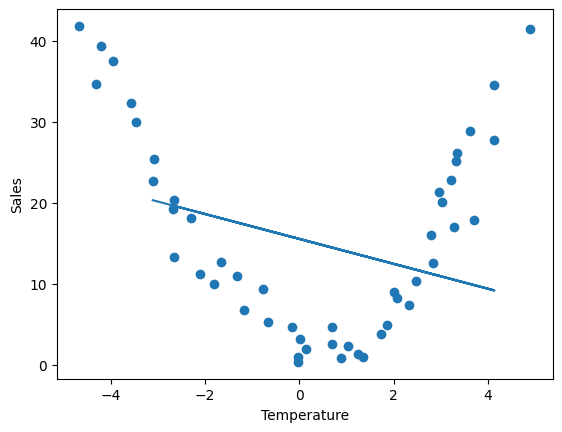

In [ ]:
#visualize the data and fitting the linear line
data=pd.read_csv("/content/ice_cream_sales.csv")
data.columns=["Temperature","Sales"]
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,0],data.iloc[:,1],test_size=0.2,random_state=3)
mlr=MultipleLinearRegression()
mlr.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))
predicted_values=mlr.predict(pd.DataFrame(x_test))
print("r2 score:",r2_score(y_test,predicted_values))
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.plot(x_test,predicted_values)
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

coefficients: [[ 2.72541208e+00]
 [-2.30997931e+00]
 [ 1.92675855e+00]
 [ 1.54320452e-01]
 [ 1.69722852e-02]
 [-2.88997554e-03]
 [-1.20529778e-03]]
intercept: [2.72541208]
r2 score: 0.9242779618683349


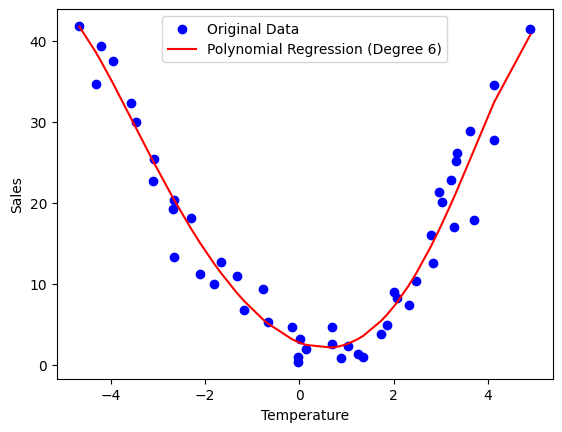

In [ ]:
#importing the dataset
data=pd.read_csv("/content/ice_cream_sales.csv")
data.columns=["Temperature","Sales"]
lr=LinearRegression()
x=get_polynomial_features(data.iloc[0:,0],degree=6)
y=pd.DataFrame(data.iloc[:,1])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
mlr=MultipleLinearRegression()
mlr.fit(x_train,y_train)
print("coefficients:",mlr.coefficients)
print("intercept:",mlr.intercept)
print("r2 score:",r2_score(y_test,mlr.predict(x_test)))
x_sorted = np.sort(data.iloc[:,0])
x_sorted_df = pd.DataFrame(x_sorted, columns=["Temperature"])
x_poly_sorted = get_polynomial_features(x_sorted_df, degree=6)
# Predict using the sorted polynomial features
y_pred_sorted = mlr.predict(x_poly_sorted)
# Plotting the original data points
plt.scatter(data["Temperature"], data["Sales"], color='blue', label="Original Data")
# Plotting the regression line
plt.plot(x_sorted, y_pred_sorted, color='red', label="Polynomial Regression (Degree 6)")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
student=pd.read_csv("/content/Student_Performance.csv")
x,y=get_polynomial_features(student.select_dtypes("int64"),degree=2),student.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
mlr.fit(x_train,y_train)
print("coefficients:",mlr.coefficients)
print("intercept:",mlr.intercept)
print("r2 score:",r2_score(y_test,mlr.predict(x_test)))

coefficients: [-3.20976048e+01  2.73301207e+00  1.01608607e+00  1.06195015e-01
  1.38076567e-01  4.76548375e-03  2.78981573e-04  8.01728276e-03
  8.41692082e-04 -4.41808303e-05  1.26901185e-03 -1.57715680e-04
  1.40534069e-02  1.24454346e-02 -1.68923101e-03]
intercept: -32.09760475669471
r2 score: 0.9882116549084468


In [ ]:
#polynomial regression using the sklearn
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(student.select_dtypes("int64"))
y=student.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=3)
lr.fit(x_train,y_train)
print("coefficients:",lr.coef_)
print("intercept:",lr.intercept_)
print("r2 score:",r2_score(y_test,lr.predict(x_test)))

coefficients: [-5.69643305e-08  2.74576397e+00  1.44686822e+00  4.96577433e+00
 -1.48638236e+00 -7.29101541e-02  3.25034452e-02 -2.24581547e-02
 -1.01193899e-01 -6.32643522e-03 -5.41908319e-02  2.03212702e-02
 -9.21272536e-01  3.71466754e-01  1.82282093e-01 -3.76386425e-03
 -2.30005931e-03  3.47323993e-02  1.89444517e-02 -3.24563457e-04
 -3.81516019e-03  2.58365148e-03  6.67646642e-03 -1.34167961e-02
 -1.00817390e-02  4.66088294e-05  4.57417484e-04 -3.24348772e-04
  2.85674667e-03  3.14312472e-03 -3.72302250e-03  9.55097617e-02
 -7.02813287e-02  1.21412416e-02 -5.91355308e-03  9.58055556e-04
 -2.07791988e-05 -1.45457492e-03 -1.10293415e-03  1.82649430e-05
  9.90774863e-05 -2.11246673e-05 -1.56233414e-03 -1.70415319e-05
  1.87503017e-05  7.85026110e-07  1.43186794e-05 -1.14799788e-05
  8.30511507e-05 -1.42890451e-05 -3.46004774e-05 -1.22683527e-04
  9.14207155e-04  8.95571085e-05  8.14698052e-04 -1.51266208e-07
 -1.33090746e-06  1.87685573e-06 -7.99097265e-07 -3.20457665e-05
  2.0821437